In [1]:
# Import Dependencies
import pandas as pd
from matplotlib import pyplot
from fbprophet import Prophet
from pandas import to_datetime
from pandas import DataFrame
import datetime as dt

In [2]:
# Read the dataset
sales_df = pd.read_csv("Resources/Sales_Data - Only the columns we need.csv")
sales_df.head()

,YEAR_,MONTH_,InvDate,InvNumber,Market,InvCustomer,CompanyName,ItemClass,SubCategory,Flavours,Product,Description,Config,UOM,Real_Qty,CAD_Value
0,2013,7,07/04/2013,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,1,153.60
1,2013,7,07/04/2013,NA0223010003,CAN,SWAL01,Swalbo,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,22,2731.52
2,2013,7,07/04/2013,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,3,460.80
3,2013,7,07/04/2013,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,2,307.20
4,2013,7,07/04/2013,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,4,614.40


In [3]:
# Get to know the data types of the data in each column
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35948 entries, 0 to 35947
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR_        35948 non-null  int64  
 1   MONTH_       35948 non-null  int64  
 2   InvDate      35948 non-null  object 
 3   InvNumber    35948 non-null  object 
 4   Market       35948 non-null  object 
 5   InvCustomer  35948 non-null  object 
 6   CompanyName  35948 non-null  object 
 7   ItemClass    35948 non-null  object 
 8   SubCategory  35948 non-null  object 
 9   Flavours     35948 non-null  object 
 10  Product      35948 non-null  int64  
 11  Description  35948 non-null  object 
 12  Config       35948 non-null  object 
 13  UOM          35948 non-null  object 
 14  Real_Qty     35948 non-null  int64  
 15  CAD_Value    35948 non-null  float64
dtypes: float64(1), int64(4), object(11)
memory usage: 4.4+ MB


In [4]:
# Convert the InvDate column into datetime64 format
sales_df['InvDate'] = pd.DatetimeIndex(sales_df['InvDate'])
sales_df.head()

,YEAR_,MONTH_,InvDate,InvNumber,Market,InvCustomer,CompanyName,ItemClass,SubCategory,Flavours,Product,Description,Config,UOM,Real_Qty,CAD_Value
0,2013,7,2013-07-04,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,1,153.60
1,2013,7,2013-07-04,NA0223010003,CAN,SWAL01,Swalbo,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,22,2731.52
2,2013,7,2013-07-04,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,3,460.80
3,2013,7,2013-07-04,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,2,307.20
4,2013,7,2013-07-04,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,4,614.40


In [5]:
# Remove the data after June 30, 2019 as there is a significant deline on sales
sales_df_new = sales_df.drop(sales_df[sales_df['InvDate'] > '2019-06-30'].index)
sales_df_new.tail()

,YEAR_,MONTH_,InvDate,InvNumber,Market,InvCustomer,CompanyName,ItemClass,SubCategory,Flavours,Product,Description,Config,UOM,Real_Qty,CAD_Value
25966,2019,6,2019-06-26,NA0723001170,CAN,SWAL01,Swalbo,ORG,F&N,PEANUT,600919,NATCAN Peanut,Organic 40gx16x8,CS,2,268.18
25967,2019,6,2019-06-26,NA0723001170,CAN,SWAL01,Swalbo,ORG,F&N,CASHEW,600914,NATCAN Cashew Nut,Organic 40gx16x8,CS,4,536.36
25968,2019,6,2019-06-26,NA0723001170,CAN,SWAL01,Swalbo,ORG,GRAN,PEANUT BUTTER,600984,NATCANGRA5PK Chocolate PB,Organic 35gx5x12,CS,2,77.76
25969,2019,6,2019-06-26,NA0723001170,CAN,SWAL01,Swalbo,CONV,LSUG,PEANUT CARAMEL,600987,NATCANLS Peanut Caramel,Conventional 40gx12x8,CS,2,201.60
25970,2019,6,2019-06-26,NA0723001170,CAN,SWAL01,Swalbo,ORG,F&N,WALNUT,600911,NATCAN Walnut,Organic 40gx16x8,CS,5,670.45


In [6]:
# Add a new column month_year to groupby month
sales_df_new['month_year'] = pd.to_datetime(sales_df['InvDate']).dt.to_period('M')
sales_df_new.head()

,YEAR_,MONTH_,InvDate,InvNumber,Market,InvCustomer,CompanyName,ItemClass,SubCategory,Flavours,Product,Description,Config,UOM,Real_Qty,CAD_Value,month_year
0,2013,7,2013-07-04,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,1,153.60,2013-07
1,2013,7,2013-07-04,NA0223010003,CAN,SWAL01,Swalbo,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,22,2731.52,2013-07
2,2013,7,2013-07-04,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,3,460.80,2013-07
3,2013,7,2013-07-04,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,2,307.20,2013-07
4,2013,7,2013-07-04,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,4,614.40,2013-07


In [7]:
# Remove the unwanted column data
sales_df_new_2 = sales_df_new.drop(["YEAR_","MONTH_","InvDate","InvNumber","Market","InvCustomer","CompanyName","ItemClass","SubCategory","Flavours","Product","Description","Config","UOM","Real_Qty"], axis=1)
sales_df_new_2.head()

,CAD_Value,month_year
0,153.60,2013-07
1,2731.52,2013-07
2,460.80,2013-07
3,307.20,2013-07
4,614.40,2013-07


In [8]:
# Rearrange the column position
sales_df_new_2 = sales_df_new_2[["month_year","CAD_Value"]]
sales_df_new_2.head()

,month_year,CAD_Value
0,2013-07,153.60
1,2013-07,2731.52
2,2013-07,460.80
3,2013-07,307.20
4,2013-07,614.40


In [9]:
# Groupby month and sum the CAD_Value i.e sales
sales_df_new_grouped = sales_df_new_2.groupby(["month_year"], as_index=False)["CAD_Value"].sum()
sales_df_new_grouped

,month_year,CAD_Value
0,2013-07,1.523696e+06
1,2013-08,2.421420e+06
2,2013-09,2.675225e+06
3,2013-10,1.920371e+06
4,2013-11,1.853762e+06
...,...,...
67,2019-02,6.160768e+05
68,2019-03,7.686584e+05
69,2019-04,1.883854e+06
70,2019-05,9.755937e+05


In [10]:
# Check the data types
sales_df_new_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   month_year  72 non-null     period[M]
 1   CAD_Value   72 non-null     float64  
dtypes: float64(1), period[M](1)
memory usage: 1.7 KB


In [11]:
# from the prophet documentation every variables should have specific names hence renaming the columns
sales_df_new_grouped = sales_df_new_grouped.rename(columns = {'month_year': 'ds',
                                'CAD_Value': 'y'})
sales_df_new_grouped.head()

,ds,y
0,2013-07,1.523696e+06
1,2013-08,2.421420e+06
2,2013-09,2.675225e+06
3,2013-10,1.920371e+06
4,2013-11,1.853762e+06


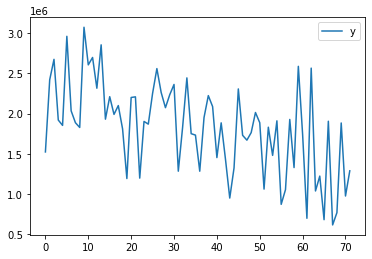

In [12]:
# Plot a time series of the existing data
sales_df_new_grouped.plot()
pyplot.show()

In [13]:
# Convert "ds" to timestamp format
sales_df_new_grouped['ds'] = sales_df_new_grouped['ds'].dt.to_timestamp('s').dt.strftime('%Y-%m')
sales_df_new_grouped.head()

,ds,y
0,2013-07,1.523696e+06
1,2013-08,2.421420e+06
2,2013-09,2.675225e+06
3,2013-10,1.920371e+06
4,2013-11,1.853762e+06


In [14]:
# Check the data types
sales_df_new_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      72 non-null     object 
 1   y       72 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [15]:
# Initialize Prophet library
model = Prophet()

In [16]:
# Fit the data in the Prophet model
model.fit(sales_df_new_grouped)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


AttributeError: 'StanModel' object has no attribute 'fit_class'

In [ ]:
# Create a dataframe for the future period based on the desired future frequency
future = model.make_future_dataframe(periods=24,freq='M')
future.head()

In [ ]:
# Predict the future months using the Prophet library which analyses the seasonality trends in the dataset
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail() 

In [17]:
#future = list()
#for i in range(1, 13):
   #date = '2019-%02d' % i
   # future.append([date])
#future = DataFrame(future)
#future.columns = ['ds']
#future['ds']= to_datetime(future['ds'])

In [18]:
#forecast = model.predict(future)
#print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())

In [19]:
# Plot the predicted data. Black dots represent the actual data, blue line respresents the predicted data and blue space indicates the uncertainty which is 80% by default
fig1 = model.plot(forecast)

NameError: name 'forecast' is not defined

In [20]:
# Plot components for seasonality trends
fig2 = model.plot_components(forecast)

NameError: name 'forecast' is not defined

In [21]:
# Python plot for interactive graphs
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model, forecast)

ModuleNotFoundError: No module named 'prophet'

In [22]:
# Python plot for interactive component graphs
plot_components_plotly(model, forecast)

NameError: name 'plot_components_plotly' is not defined

In [23]:
forecast[['ds','yhat']].head()

NameError: name 'forecast' is not defined

In [24]:
# Arima

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
from statsmodels.tsa.stattools import adfuller, kpss

In [27]:
# Test
# ADF Test
result = adfuller(sales_df_new_grouped.y, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.6925843235075102
p-value: 0.8486610258425392
Critial Values:
   1%, -3.5443688564814813
Critial Values:
   5%, -2.9110731481481484
Critial Values:
   10%, -2.5931902777777776


In [28]:
# KPSS Test
result = kpss(sales_df_new_grouped.y, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 0.620292
p-value: 0.020792
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\Shay\.conda\envs\PythonData\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


In [29]:
# Forecast Using Auto Arima
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(sales_df_new_grouped.y, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2106.535, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2289.097, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2144.956, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2250.563, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2107.918, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2107.407, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2240.951, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2128.784, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2110.095, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2112.004, Time=0.02 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.342 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   72
Model:               SARIMAX(1, 0, 1)   Log Likelihood        

In [30]:
# Based on the results above the best models are: ARIMA(1,0,1)(0,0,0)[0] 

In [31]:
# Fit ARIMA model
model = ARIMA(train, order=(3,1,6))
model_fit = model.fit(disp=0)
print(model_fit.summary())

NameError: name 'train' is not defined

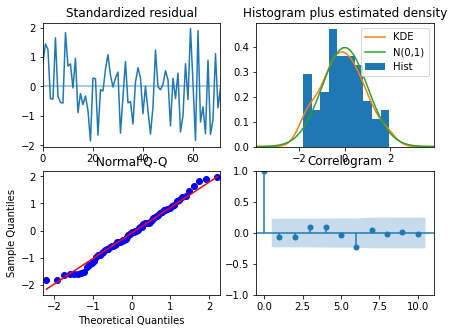

In [32]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [33]:
# Standardized residul: 
# The residual errors fluctuate around a mean of zero and have a uniform variance

# 

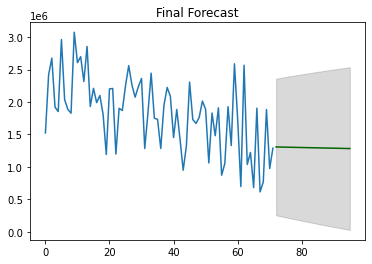

In [34]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(sales_df_new_grouped.y), len(sales_df_new_grouped.y)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(sales_df_new_grouped.y)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast")
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

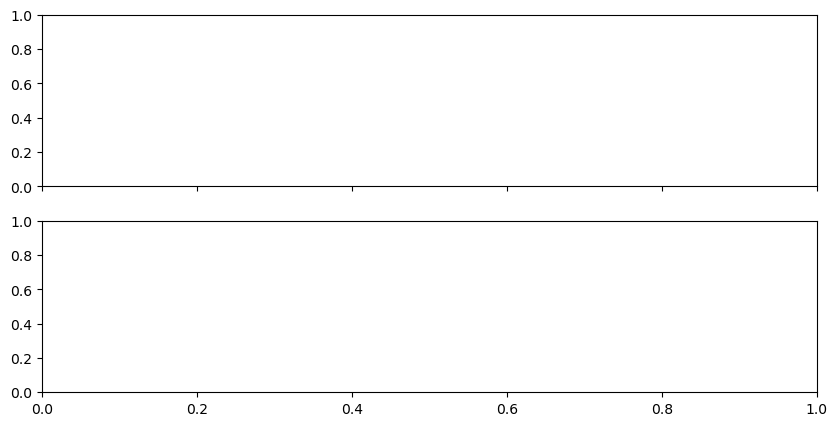

In [35]:
# Using SARIMA


# Import
# data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(sales_df_new_grouped[:], label='Original Series')
axes[0].plot(sales_df_new_grouped[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(sales_df_new_grouped[:], label='Original Series')
axes[1].plot(sales_df_new_grouped[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()


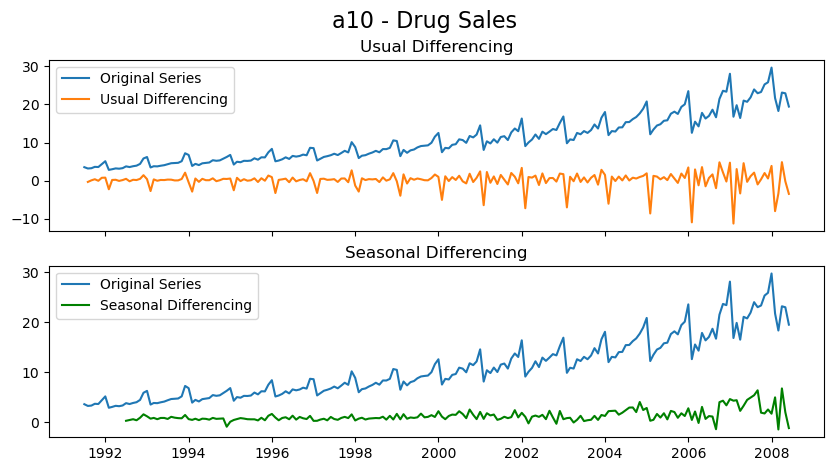

In [36]:
# Import
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

In [37]:
import pmdarima as pm
smodel = pm.auto_arima(sales_df_new_grouped, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

ValueError: could not convert string to float: '2013-07'